Just some useful functions for time series plots (even if you don't statistically analyse the time series per se, you could use these ploting functions to graphically inspect the trends).

I've created some fake data to show the different plotting functions. 

`A`, `B`, `C` and `D` would be separate countries, and the actual datapoints would be events of some kind, that happened in that timepoint (the events could be accidents, number of deaths, number of car crashes etc).

*NB*: I apologise I'm going to use the American spelling of colours, just because its easier than switching spellings!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# creating some fake time series data

data_1 = np.abs(np.arange(30) + np.random.normal(0, 5, size = 30)).astype('int')

data_2 = np.abs(np.arange(30) + np.random.normal(-10, 5, size = 30)).astype('int')

data_3 = np.abs(np.arange(30) + np.random.normal(-20, 5, size = 30)).astype('int')

data_4 = np.abs(np.arange(30) + np.random.normal(-30, 5, size = 30)).astype('int')


df = pd.DataFrame({'A': data_1,
                 'B': data_2,
                  'C': data_3,
                  'D': data_4})

df.index.rename('Time point:', inplace = True)

df.head(10)

,A,B,C,D
Time point:,,,,
0,2,10,21,29
1,2,8,10,28
2,2,8,16,31
3,0,2,13,23
4,4,15,14,24
5,4,3,15,29
6,6,0,16,20
7,7,2,15,26
8,15,0,14,27


You can plot the raw data with `df.plot()`:

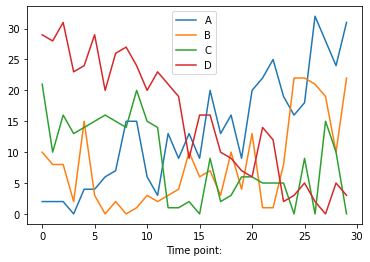

In [2]:
df.plot();

You can use `df.rolling().mean().plot()` to plot a rolling average. You can use the keyword argument `window =` to set how many timepoints you want the rolling mean to be calculated over. 

I'm going to use `window = 3`, which if the timepoints were months, would be a 3 month rolling average etc.

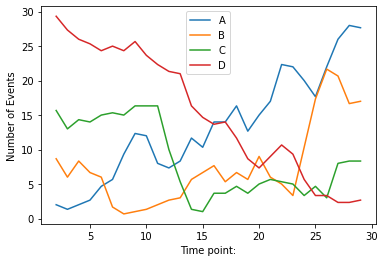

In [3]:
# plotting a rolling average, using 3 timepoints at a time to calculate the average

# by default this will plot all of the time series in different colors

df.rolling(window = 3).mean().plot()

plt.ylabel('Number of Events');

You can experiment with different windows to 'smooth' the lines to different degrees, which can make overall trends easier to see.

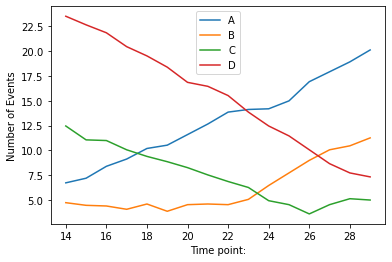

In [4]:
# experimenting with a window of 15 timepoints
df.rolling(window = 15).mean().plot()

plt.ylabel('Number of Events');

It's a bit of a balancing act, as windows which are too large can actually obscure the trends:

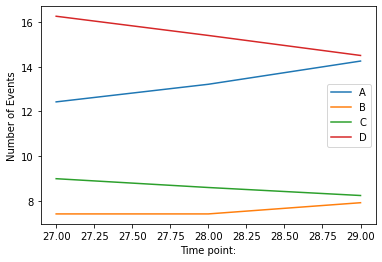

In [5]:
# experimenting with a window of 28 timepoints
df.rolling(window = 28).mean().plot()

plt.ylabel('Number of Events');

For time series plots, its quite nice to use the `figsize =` argument to make the plot quite 'long' on the x axis, e.g.:

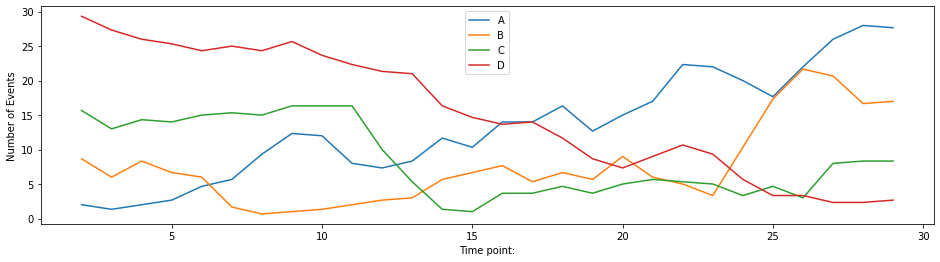

In [6]:
df.rolling(window = 3).mean().plot(figsize = (16, 4)) # you can experiment with different dimensions for `figsize`
plt.ylabel('Number of Events');

If you want to use the same colors for each country throughout all of the plots, you could do something like this, which I think is similar to one of the dataframes you showed me earlier, e.g. where you link a country to a unique color.:

In [7]:
color_map = pd.DataFrame({'color': ['red', 'green', 'blue', 'orange']})

# putting the country names in the index, so they can be gotten with .loc
color_map.index = ['A', 'B', 'C', 'D']

# renaming the index, not essential, just making it clearer for this example
color_map.index.rename('Country', inplace = True)

color_map

,color
Country,
A,red
B,green
C,blue
D,orange


(There's a list of all the color names here: https://matplotlib.org/stable/gallery/color/named_colors.html)

Then you could use `.loc` to get the colors for the relevant countries, depending which ones you want in the plot. You can then pass these to the `color =` argument in the `.plot()` method.

If you want to plot all of the countries, just pass the whole `color` column to the `color =` argument:

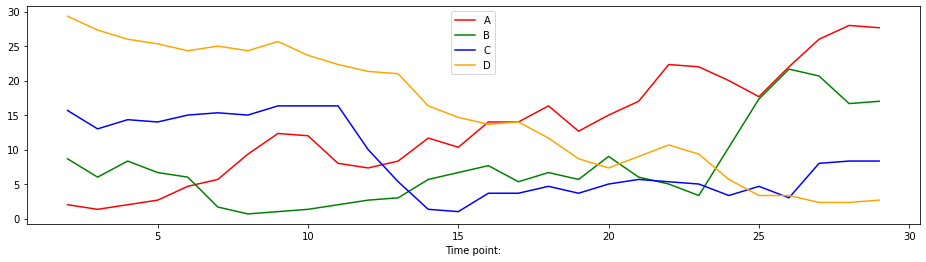

In [8]:
                                                      # passing the whole 'color' column from the color_map df
df.rolling(window = 3).mean().plot(figsize = (16, 4), color = color_map['color']);

If you only want to plot data from a subset of the countries, you can use `.loc` to get the relevant colors for those countries from the color map dataframe.

For example, if you only wanted to plot countries `B` and `D`:

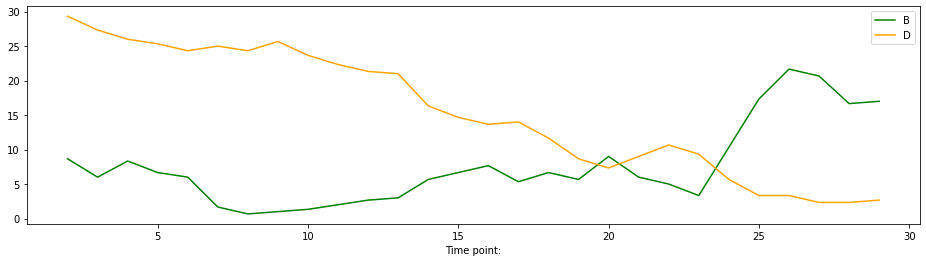

In [9]:
# df[['B', 'D']] gets the datapoints for countries B and D

# color_map['color'].loc[['B', 'D']] gets the relevant colors from the color_map dataframe, to pass to the `color =` argument

df[['B', 'D']].rolling(window = 3).mean().plot(figsize = (16, 4), color = color_map['color'].loc[['B', 'D']]);

You can do this in any order, as long as the list you give to `.loc` for the `color =` argument is in the same order as the list you use for `df.rolling()`. E.g.:

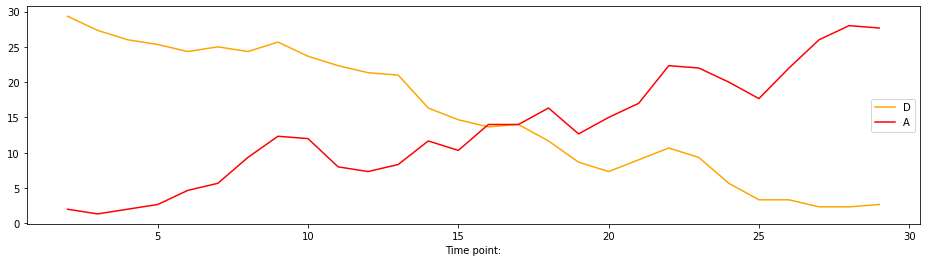

In [10]:
# country names HERE: ........................................... should be in the same order as HERE:
df[['D', 'A']].rolling(window = 3).mean().plot(figsize = (16, 4), color = color_map['color'].loc[['D', 'A']]);

You can also use the same color map for cross-sectional plots, e.g. data from one timepoint only:

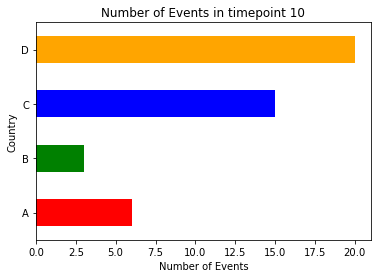

In [11]:
# create a barplot of the number of events in timepoint 10
df.loc[10].plot(kind = 'barh', color = color_map['color'])

plt.title('Number of Events in timepoint 10')
plt.xlabel('Number of Events')
plt.ylabel('Country');

And this will also work if you want to compare only a subset of the countries (again, make sure the lists of country names are in the same order):

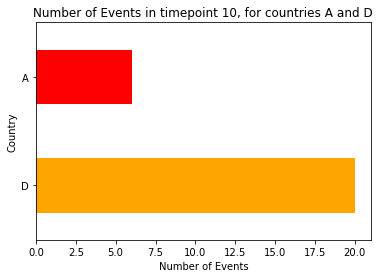

In [12]:
# create a barplot of the number of events in timepoint 10, but only for countries D and A
df[['D', 'A']].loc[10].plot(kind = 'barh', color = color_map['color'].loc[['D', 'A']])

plt.title('Number of Events in timepoint 10, for countries A and D')
plt.xlabel('Number of Events')
plt.ylabel('Country');

If you wanted to show where a change had taken place in a particular country, which may explain a change in the trend, you could experiment with using `plt.plot()` to mark the timepoint of the change.

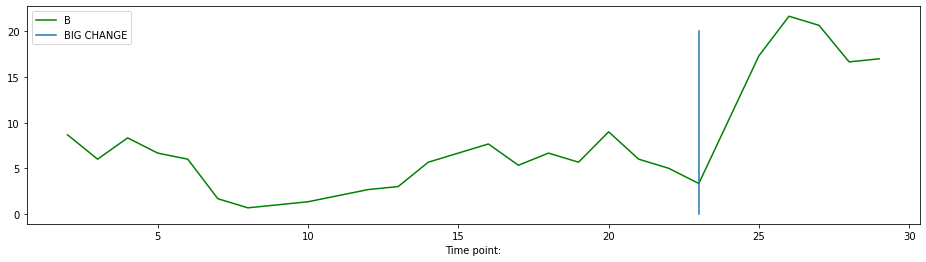

In [23]:
df['B'].rolling(window = 3).mean().plot(figsize = (16, 4), color = color_map['color'].loc['B'])

# plot a line showing the timepoint at which a big change occured (the first list is the x coordinates, the second list
# is the y coordinates)
plt.plot([23, 23], [0, 20], label = 'BIG CHANGE')
plt.legend();

All of the above functions/methods will also work with `nans` in the time series, but you'll get gaps in the plot (I think you said you'd already seen this earlier):

In [14]:
# adding some nans to the timeseries
df_with_nans = df.copy()

for col_name in df_with_nans.columns:
    
    random_rows = np.random.choice(np.arange(len(df)), size = np.random.randint(10))
    
    df_with_nans[col_name].iloc[random_rows] = np.nan
    
df_with_nans

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,A,B,C,D
Time point:,,,,
0,2.0,10.0,21.0,29.0
1,2.0,8.0,10.0,28.0
2,2.0,8.0,NaN,31.0
3,NaN,2.0,13.0,23.0
4,4.0,15.0,14.0,24.0
5,4.0,3.0,15.0,29.0
6,6.0,0.0,16.0,20.0
7,7.0,2.0,15.0,26.0
8,15.0,0.0,14.0,27.0


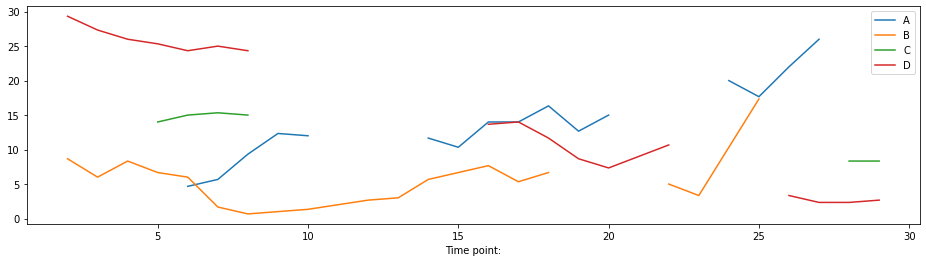

In [15]:
df_with_nans.rolling(window = 3).mean().plot(figsize = (16, 4));

You could experiment with the `df.fillna()` method, which will fill in the missing data, if you read the documentation there's a few methods it can use to do fill the `nans`:


*NB* this is probably better if there are relatively few `nans`, otherwise there's quite a lot of guesswork going on, but I think that should be ok as long as you're explicit about what method has been used.

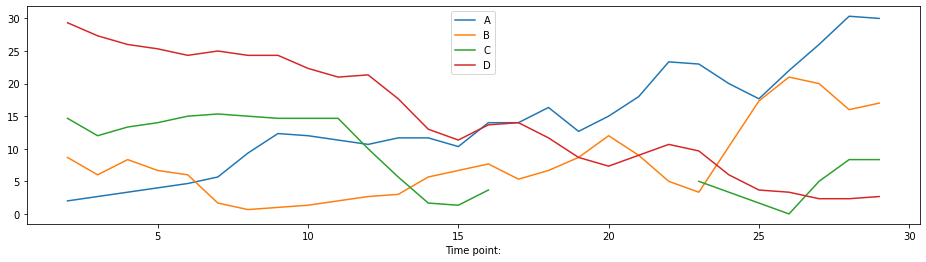

In [16]:
df_fill_nans = df_with_nans.fillna(method = 'backfill', limit = 1) # you can experiment with different methods and limits

df_fill_nans.rolling(window = 3).mean().plot(figsize = (16, 4));

You could also use `df.dropna()` to remove the nans completely. Pandas looks like it fills in the gaps, I'm not sure what method it uses to do that:

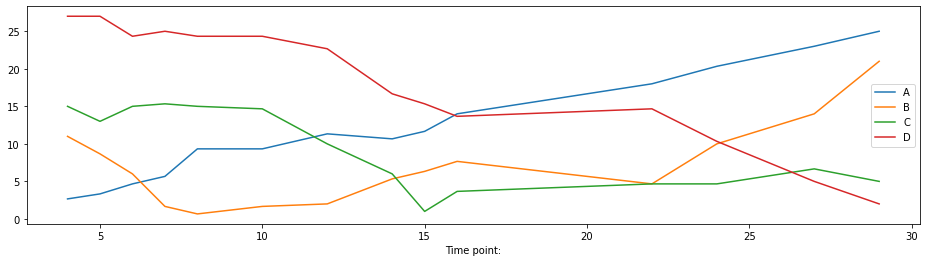

In [17]:
df_drop_nans = df_with_nans.dropna().copy()

df_drop_nans.rolling(window = 3).mean().plot(figsize = (16, 4));

But there will be missing rows:

In [18]:
len(df_drop_nans)

16

In [19]:
len(df)

30

So if you're going to drop the `nans`, but pandas makes it look like there's data for each timepoint, its probably best to be explicit that some of the data is actually missing, even if the graph makes it look like it isn't! (You could maybe do several plots, one with the `nans` included and other plots where they're dealt with by filling or dropping etc...)

Also, I've just used numbers for the timepoints here. If you've got dataframes with dates in a format like DD-MM-YYYY etc, you might want to experiment with https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

It can be very useful to have the dates in the index.

The cells below show this with some Covid data:

In [20]:
# all data from: https://coronavirus.data.gov.uk/

# creating a dataframe for the case data
cases = pd.read_csv('cases_by_date_reported.csv')

# dropping irrelevant columns
cases.drop(columns = ['areaType', 'areaCode', 'cumCasesByPublishDate'], inplace = True)

# converting the dates to datetime format
cases['date'] = pd.to_datetime(cases['date'])

# setting the index as the dates
cases.set_index('date', inplace = True)

cases

,areaName,newCasesByPublishDate
date,,
2020-10-21,United Kingdom,26688
2020-10-20,United Kingdom,21331
2020-10-19,United Kingdom,18804
2020-10-18,United Kingdom,16982
2020-10-17,United Kingdom,16171
...,...,...
2020-01-07,United Kingdom,0
2020-01-06,United Kingdom,0
2020-01-05,United Kingdom,0


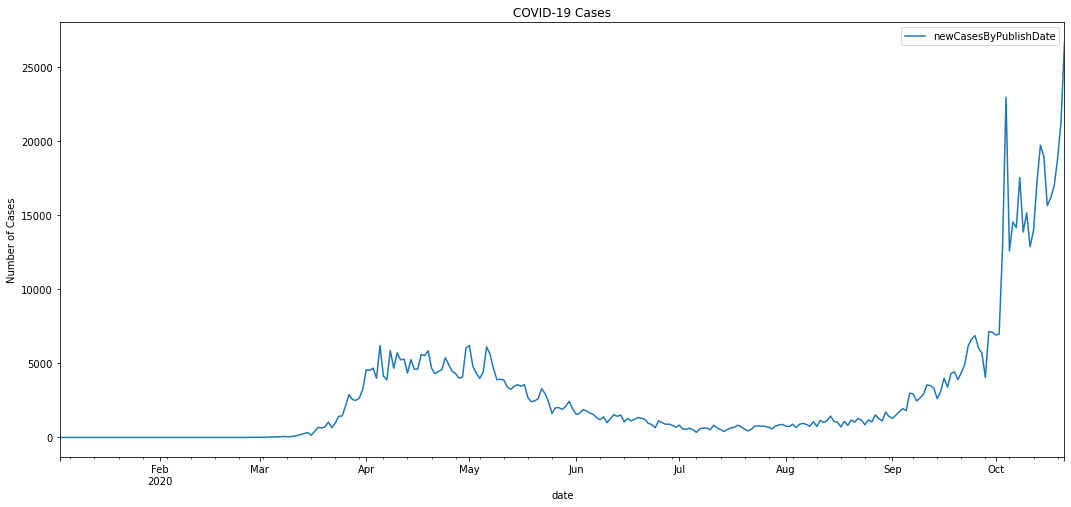

In [22]:
cases.plot(figsize = (18,8))
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases');

Having the dates (in datetime format) in the index is very useful for 'zooming in' on a section of the time series, e.g.:

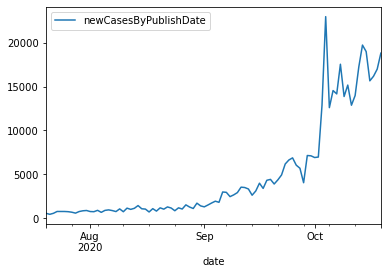

In [27]:
cases.loc['2020-10-19' : '2020-7-20'].plot();